In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [6]:

dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtype": dtypes, "num_unique": n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [7]:
from preproccessing.chk_type import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [47]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] = df[cols].astype('category')

In [8]:
from preproccessing.chk_type import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [13]:
def handle_types(cols):
    df[cols] = df[cols].astype('category')
    chk_type(df)

In [36]:
null = df.isnull().sum()
ratio =null/df.shape[0]
pd.DataFrame({"NULL": null, "ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
NULL,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [11]:
df = df.dropna(subset = ['Embarked'])   #DROP RAWS



In [12]:
df = df.drop('Cabin',axis = 1) #drop columns

In [12]:
median = df['Age'].median()
df.fillna({'Age': median}, inplace=True)

null = df.isnull().sum()
ratio = null/df.shape[0]
pd.DataFrame({"NULL": null, "ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
NULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.771044,0.002245


In [36]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.8 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.8 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 1.9 MB/s eta 0:00:03
   --------------------- -------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.dtypes

Survived      int64
Pclass        int64
Sex             str
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin           str
Embarked        str
dtype: object

In [11]:
num_cols = ['Age','Fare']

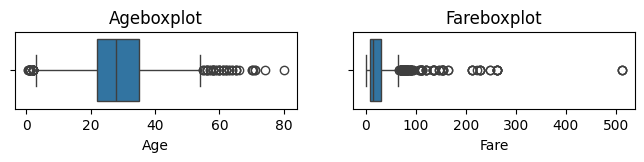

In [59]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient = 'h')
    plt.title(f"{col}boxplot")
plt.show()

In [17]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)   #quantile automatic calculate Q2
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 -1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    lower_Outliers = df[df[col]<lower_fence][col].values
    upper_Outliers = df[df[col]>upper_fence][col].values
    df.replace(
        {col: dict.fromkeys(df.loc[df[col] < lower_fence, col], lower_fence)},
        inplace=True
    )

    df.replace(
        {col: dict.fromkeys(df.loc[df[col] > upper_fence, col], upper_fence)},
        inplace=True
    )

In [18]:
df.duplicated().sum()

np.int64(116)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

ValueError: num must be an integer with 1 <= num <= 2, not 3

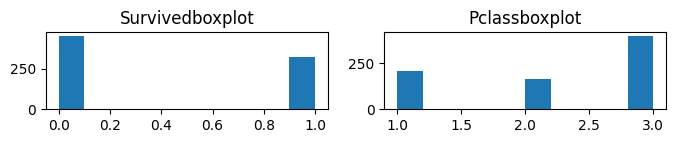

In [26]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col])
    plt.title(f"{col}boxplot")
plt.show()

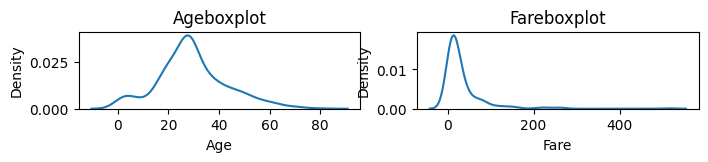

In [67]:

num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col}boxplot")
plt.show()

In [69]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='str')

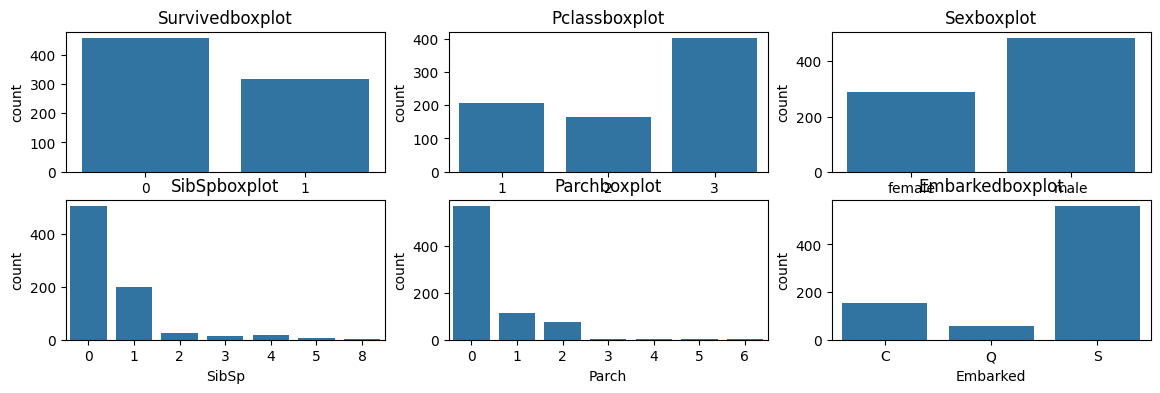

In [72]:
cat_cols = df.select_dtypes('category').columns
plt.figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data = df)
    plt.title(f"{col}boxplot")
plt.show()